In [2]:
%matplotlib inline
import sys
import os
sys.path.append("../src")
from graphprobe import loadviz, summarize
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
 category_colors = OrderedDict([                                                
       ('scene',    '#3288bd'),                                                   
       ('object',   '#99d594'),                                                   
       ('part',     '#e6f598'),                                                   
      ('material', '#fee08b'),                                                   
      ('texture',  '#fc8d59'),                                                   
      ('color',    '#d53e4f'),                                                  
      ('total',    '#aaaaaa')])
threshold = 0.05
categories = set(category_colors.keys())  
num_blobs = 8
script = "/home/nakamura/network_dissection/NetDissect/research/comparison_numdetec_1215.ipynb"

In [4]:
# define models
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "../dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "../dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "../dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "../dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

alex_hi = {}
alex_hi["name"] = "alenet_imagenet_768"
alex_hi["directory"] = "../dissection_test/alexnet_imagenet_full_conv_768/"
alex_hi["blobs"] = ["fc6-conv", "fc7-conv", "fc8-conv"]

senti_hi = {}
senti_hi["name"] = "sentibank_768"
senti_hi["directory"] = "../dissection_test/caffe_sentibank_full_conv/"
senti_hi["blobs"] =  ["fc6-conv", "fc7-conv", "fc8-conv"]

vgg_mat_hi = {}
vgg_mat_hi["name"] = "vgg_material_768"
vgg_mat_hi["directory"] = "../dissection_test/vgg_material_full_conv/"
vgg_mat_hi["blobs"] = ["fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face_hi = {}
vgg_face_hi["name"] = "vgg_face_768"
vgg_face_hi["directory"] = "../dissection_test/VGG_FACE_full_conv/"
vgg_face_hi["blobs"] = ["fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face, alex_hi, senti_hi, vgg_mat_hi, vgg_face_hi]
low_models = [alex, vgg_material, sentibank, vgg_face]
high_models = [alex_hi, senti_hi, vgg_mat_hi, vgg_face_hi]

In [5]:
now = datetime.datetime.now()

data[network_name] = [blob1, blob2, ...]

In [6]:
def make_data(models, cat):
    data = {}
    
    for model in models:
        data[model["name"]] = []
        for blob in model["blobs"]:
            stats = summarize(loadviz(model["directory"], blob), threshold, top_only=True)
            data[model["name"]].append(stats[cat])
    return data

In [7]:
def plot_graph(models, cat):
    data = make_data(models, cat)
    fig = plt.figure(figsize=(12, 8))
    ax = plt.gca()
    for model in models:
        ax.plot(data[model["name"]], label=model["name"])
    ax.set_xticks(range(len(models[0]["blobs"])))
    ax.set_xticklabels(models[0]["blobs"])
    ax.set_title("Comparison_of_number_of_detectors_{}".format(cat))

    plt.legend(loc="upper left")

    ax.set_ylabel('portion of units alinged to a category concept')
    return fig, ax

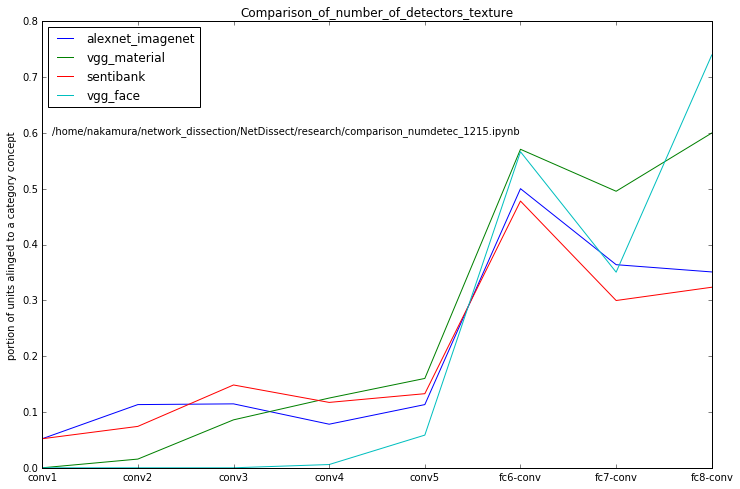

In [8]:
fig, ax = plot_graph(low_models, "texture")
ax.set_ylim(0, 0.8)
ax.text(0.1, 0.6, script)
plt.savefig(os.path.join("figures","number_of_detectors", "comparison_of_number_of_detectors_texture_{0:%m%d}.pdf".format(now)))
plt.show()

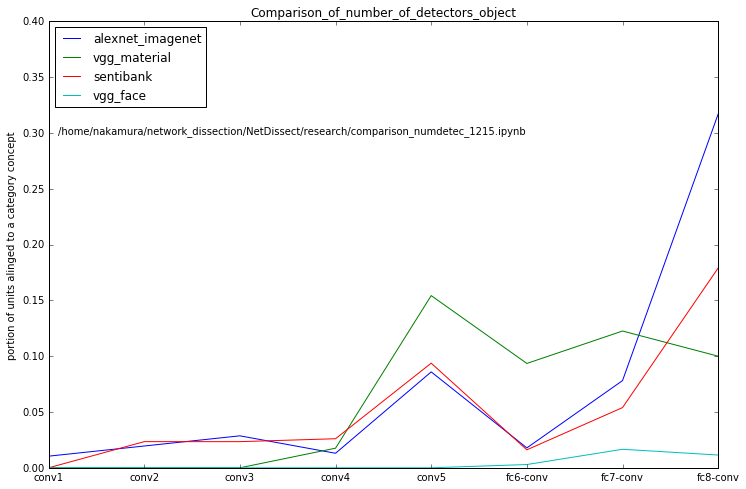

In [9]:
fig, ax = plot_graph(low_models, "object")
ax.set_ylim(0, 0.4)
ax.text(0.1, 0.3, script)
plt.savefig(os.path.join("figures","number_of_detectors", "comparison_of_number_of_detectors_object_{0:%m%d}.pdf".format(now)))
plt.show()

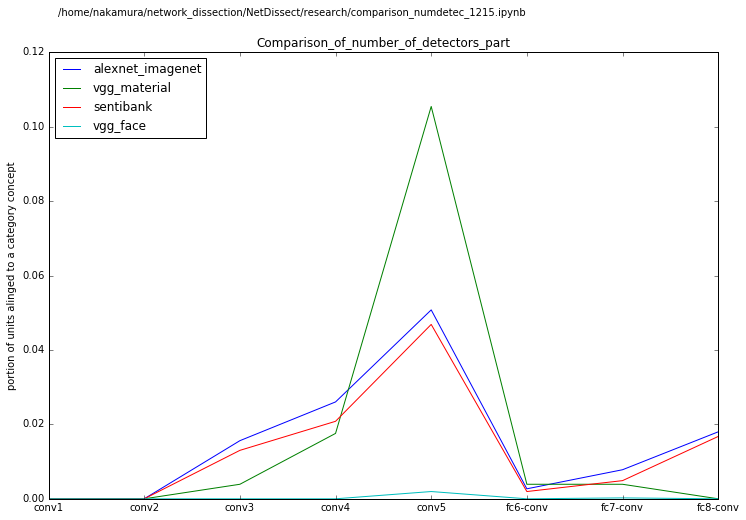

In [10]:
fig, ax = plot_graph(low_models, "part")
ax.set_ylim(0, 0.12)
ax.text(0.1, 0.13, script)
plt.savefig(os.path.join("figures","number_of_detectors", "comparison_of_number_of_detectors_part_{0:%m%d}.pdf".format(now)))
plt.show()

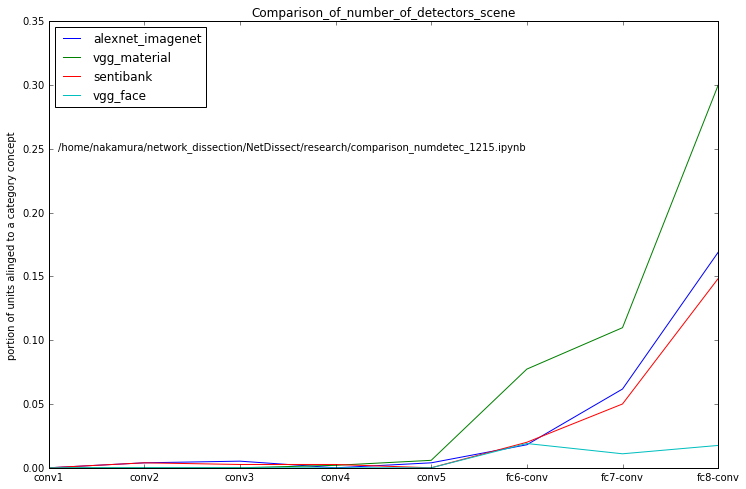

In [11]:
fig, ax = plot_graph(low_models, "scene")
ax.set_ylim(0, 0.35)
ax.text(0.1, 0.25, script)
plt.savefig(os.path.join("figures","number_of_detectors", "comparison_of_number_of_detectors_scene_{0:%m%d}.pdf".format(now)))
plt.show()

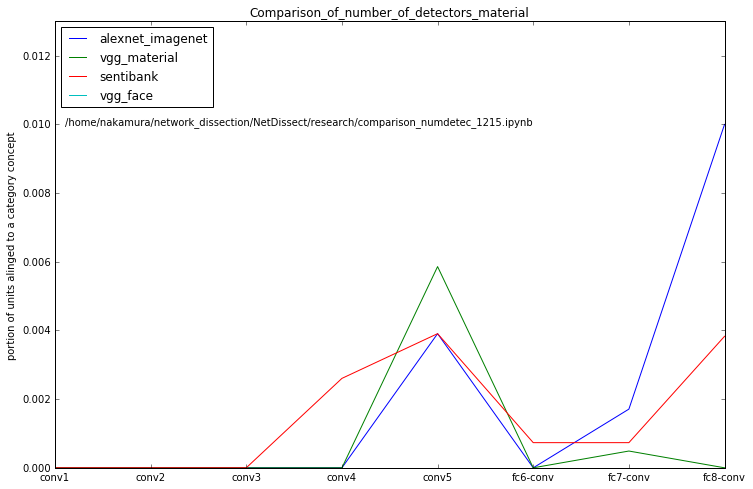

In [12]:
fig, ax = plot_graph(low_models, "material")
ax.set_ylim(0, 0.013)
ax.text(0.1, 0.010, script)
plt.savefig(os.path.join("figures","number_of_detectors", "comparison_of_number_of_detectors_material_{0:%m%d}.pdf".format(now)))
plt.show()

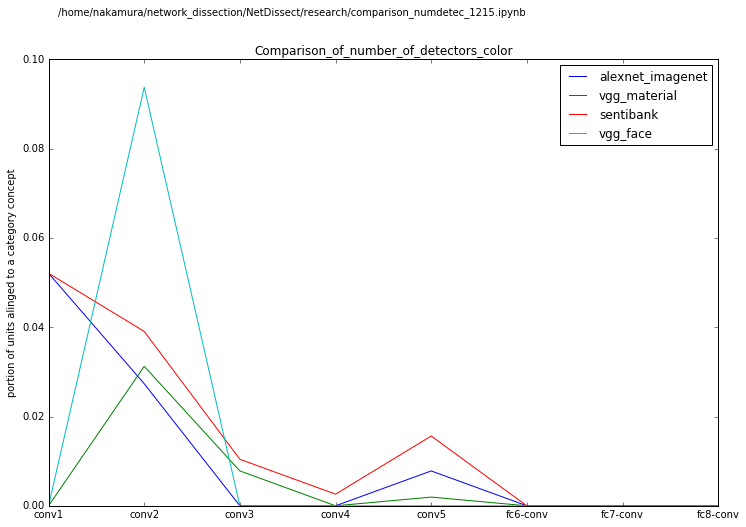

In [13]:
fig, ax = plot_graph(low_models, "color")
ax.set_ylim(0, 0.1)
ax.text(0.1, 0.11, script)
ax.legend(loc="upper right")
plt.savefig(os.path.join("figures","number_of_detectors", "comparison_of_number_of_detectors_color_{0:%m%d}.pdf".format(now)))
plt.show()